# Lecture 25 – CSCI 3022


[Acknowledgments Page](https://ds100.org/fa23/acks/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
rng = np.random.default_rng()

In [3]:
# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<br/><br/>

---

# I). Boba Tea:  Two Constant Models, Fit to Different Losses

### Exploring MAE

In [ ]:
boba = np.array([20, 21, 22, 29, 33])

Let's plot the $L_1$ loss for a **single** observation. We'll plot the $L_1$ loss for the first observation; since $y_1 = 20$, we'll be plotting

$$
\Large
L_1(20, \theta_0) = |20 - \theta_0|
$$

In [ ]:
thetas = np.linspace(10, 30, 1000)
l1_loss_single_obvs = np.abs(boba[0] - thetas)

In [ ]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

plt.plot(thetas, l1_loss_single_obvs,  'g--', );
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'L1 Loss for $y = 20$');
# plt.savefig('l1_loss_single_obs.png', bbox_inches = 'tight');

In [ ]:
def mae_constant(theta_0, data):
    return np.mean(np.array([np.abs(y_obs - theta_0) for y_obs in data]), axis=0)

thetas = np.linspace(10, 40, 1000)
l1_loss_thetas = mae_constant(thetas, boba)
plt.plot(thetas, l1_loss_thetas, color = 'green', lw=3);
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'MAE across all data');
# plt.savefig('l1_loss_average.png', bbox_inches = 'tight');

### Median Minimizes MAE for the Constant Model


In [ ]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

yobs = boba
thetahat = np.median(yobs)

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.scatter([thetahat], [-.1], color='green', lw=4, label=r"$\hat{\theta}_0$");
plt.xlabel("Sales")
plt.legend()
plt.yticks([])
# plt.savefig('boba_rug.png', bbox_inches = 'tight');
plt.show()

### MSE

In [ ]:
def mse_constant(theta, data):
    return np.mean(np.array([(y_obs - theta) ** 2 for y_obs in data]), axis=0)

### Two Constant Models, Fit to Different Losses

In [ ]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

nplots = 2
def plot_losses(data, title=None, theta_range=(10, 40)):
    thetas = np.linspace(theta_range[0], theta_range[1], 1000)
    l2_loss_thetas = mse_constant(thetas, data)
    thetahat_mse = np.mean(data)

    l1_loss_thetas = mae_constant(thetas, data)
    thetahat_mae = np.median(data)

    fig, axs = plt.subplots(1, nplots, figsize=(5*2+0.5, 3.5))
    axs[0].plot(thetas, l2_loss_thetas, lw=3);
    axs[0].scatter([thetahat_mse], [mse_constant(thetahat_mse, data)], s=100)
    axs[0].annotate(r"$\hat{\theta}_0$ = " + f"{thetahat_mse:.1f}",
                    xy=(thetahat_mse, np.average(axs[0].get_ylim())),
                    size=20, ha='center', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
    axs[0].set_xlabel(r'$\theta_0$');
    axs[0].set_ylabel(r'MSE');

    axs[1].plot(thetas, l1_loss_thetas, color = 'green', lw=3);
    axs[1].scatter([thetahat_mae], [mae_constant(thetahat_mae, data)], color='green', s=100)
    axs[1].annotate(r"$\hat{\theta}_0$ = " + f"{thetahat_mae:.1f}",
                    xy=(thetahat_mae, np.average(axs[1].get_ylim())),
                    size=20, ha='center', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
    axs[1].set_xlabel(r'$\theta_0$');
    axs[1].set_ylabel(r'MAE');
    if title:
        fig.suptitle(title)
    fig.tight_layout()
    return fig

In [ ]:
fig = plot_losses(boba)
plt.figure(fig)
# plt.savefig('loss_compare.png', bbox_inches = 'tight');
plt.show()

#### More loss comparison: Outliers

In [ ]:
boba_outlier = np.array([20, 21, 22, 29, 33, 1033])
fig = plot_losses(boba_outlier, theta_range=[-10, 300])
plt.figure(fig)
# plt.savefig('loss_outlier.png', bbox_inches = 'tight');
plt.show()

#### Uniqueness under Different Loss Functions

In [ ]:
boba_even = np.array([20, 21, 22, 29, 33, 35])
fig = plot_losses(boba_even)
plt.figure(fig)
#plt.savefig('loss_unique.png', bbox_inches = 'tight');
plt.show()

# II).  Simple Linear Regression


### Standard Units

$$
\text{StandardUnits}(x) = \frac{x - \text{Mean}(x)}{\text{Stdev}(x)} 
$$

In [ ]:
def standard_units(x):
    """Converts an array x to standard units"""
    return ...

### Correlation

$$
\begin{align}
r 
& = \text{Mean}\left(\text{StandardUnits}(x) *  \text{StandardUnits}(y)\right)\\
& = \frac{1}{n} \sum_{i=1}^n \text{StandardUnits}(x_i) *  \text{StandardUnits}(y_i)\\
& = \frac{1}{n}\sum_{i=1}^n \left( \frac{x_i - \text{Mean}(x)}{\text{Stdev}(x)} \right) * \left( \frac{y_i - \text{Mean}(y)}{\text{Stdev}(y)} \right) \\
\end{align}
$$

In [ ]:
def correlation(x, y):
    """Computes the correlation between arrays x and y"""
    x_su = ...
    y_su = ...
    return ...

### Example:  Predicting children's (adult) heights from heights of their parents

Can we predict how tall a child will grow based on the height of their parents?

To do this we will use the famous Galton's height dataset (https://galton.org/essays/1880-1889/galton-1886-jaigi-regression-stature.pdf) that was collected to demonstrate the connection between parent's heights and the height of their (adult) children.  The data were collected in the late 19th century in England. He coined the term regression towards mediocrity to describe the result of his linear model. (Note that the paper was written in 1886. The “computer” mentioned in the paper was actually a person whose job was to do number crunching.) Surprisingly, Galton’s analysis is still useful today (see e.g. Predicting height: the Victorian approach beats modern genomics (https://www.wired.com/2009/03/predicting-height-the-victorian-approach-beats-modern-genomics/)

Sir Francis Galton (1822–1911) was an English statistician. He founded many concepts in statistics, such as correlation, quartile, percentile and regression, that are still being used today.

The description of the data can be found here:  https://ytliu0.github.io/Stat390EF-R-Independent-Study-archive/RMarkdownExercises/GaltonData.html

(Heights are given in inches in this table)

In [ ]:
heights = pd.read_csv("data/family_heights.csv")


heights["parent ave height (in)"] = (heights["father"]+heights["mother"])/2

heights.head()

In [ ]:
px.scatter(heights, x="parent ave height (in)", y="child")

In [ ]:
correlation(heights["parent ave height (in)"], heights["child"])

## Finding the "best fit" line for this data

In [ ]:
guess_slope=1
guess_intercept=-.5

guess_slope2=.66
guess_intercept2=22

guess_slope3= .71
guess_intercept3= 20

fig = px.scatter(heights, x="parent ave height (in)", y="child")
xtest = np.arange(62, 73, 0.5)
fig.add_scatter(x=xtest, 
                y=guess_slope * xtest + guess_intercept,
                name = f"{np.round(guess_slope, 2)} x + {(guess_intercept)}")

fig.add_scatter(x=xtest, 
                y=guess_slope2 * xtest + guess_intercept2,
                name = f"{np.round(guess_slope2, 2)} x + {(guess_intercept2)}")

fig.add_scatter(x=xtest, 
                y=guess_slope3 * xtest + guess_intercept3,
                name = f"{np.round(guess_slope3, 2)} x + {(guess_intercept3)}")

fig

## Computing the Error (aka Residual)

The error (also called the residual) is the difference between the actual and predicted value:

$$
\text{residual = error} = y - y_\text{predicted}
$$


In [ ]:
#fig = px.scatter(heights, x="parent ave", y="child")
#xtest = np.arange(62, 73, 0.5)
#fig.add_scatter(x=xtest, 
                #y=guess_slope * xtest + guess_intercept,
                #name = f"{np.round(guess_slope, 2)} x + {np.round(guess_intercept)}")

y = heights["child"]
guess_slope = .3
guess_intercept=45

predicted=guess_slope *heights["parent ave height (in)"] + guess_intercept

errors = y - predicted
print ("MSE", np.mean(errors ** 2))

fig = px.scatter(heights, x="parent ave height (in)", y="child")
xtest = np.arange(62, 75, 1)
fig.add_scatter(x=xtest, 
                y=guess_slope * xtest + guess_intercept,
                name = f"{np.round(guess_slope, 2)} x + {np.round(guess_intercept)}")
fig.add_scatter(x=heights["parent ave height (in)"].repeat(3), 
                y=np.ravel(np.vstack([y, predicted, np.nan * predicted]).T),
                marker_color="gray", line_width=0.75, name="residuals")
fig

<br>

---

## Mean Squared Error as Function of our Model (Line)

In [ ]:
def height_mse(slope, intercept):
    predicted = ...
    actual = ...
    errors = predicted - actual
    mse = ...
    return mse

In [ ]:
from datascience import *


demo_slope = 0.664495262353   #We'll show where this comes from below
demo_intercept = 22.4618399558  #We'll show where this comes from below


alt_slopes = demo_slope + np.arange(-2, 2, .1)
alt_intercepts = demo_intercept + np.arange(-20, 20, 1)
variations = Table(["Slope", "Intercept", "MSE"])
for new_slope in alt_slopes:
    for new_intercept in alt_intercepts:
        mse = height_mse(new_slope, new_intercept)
        variations.append([new_slope, new_intercept, mse])
    
variations
go.Figure(data=[
    go.Contour(x=variations.column("Slope"), y=variations.column("Intercept"), z=variations.column("MSE")), 
    go.Scatter(x=[demo_slope], y=[demo_intercept], marker_color="red")
],
layout=dict(width = 800,height=600, xaxis_title="Slope", yaxis_title="Intercept"))

In [ ]:
go.Figure(data=[
    go.Surface(x = alt_slopes, y = alt_intercepts,
               z=variations.column("MSE").reshape(len(alt_slopes), len(alt_intercepts)).T),
    go.Scatter3d(x=[demo_slope], y=[demo_intercept], z=[height_mse(demo_slope, demo_intercept)])], 
          layout=dict(height=1000, 
                      scene_xaxis_title="Slope", scene_yaxis_title="Intercept", 
                      scene_zaxis_title="MSE"))

We want to find the value that minimizes the MSE!

### Optimal Slope and Intercept for SLR

$$
\begin{align}
\text{slope} &= r * \frac{\text{Stdev}(y)}{\text{Stdev}(x)}\\
\text{intercept} & = \text{Mean}(y) - \text{slope} * \text{Mean}(x)
\end{align}
$$

(where $r$ is the correlation between x and y)

In [ ]:
def slope(x, y):
    """Computes the slope of the regression line"""
    r = correlation(x, y)
    y_sd = np.std(y)
    x_sd = np.std(x)
    return ...

In [ ]:
def intercept(x, y):
    """Computes the intercept of the regression line"""
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return ...

In [ ]:
def fit_least_squares(x, y):
    return intercept(x,y), slope(x,y)

### Linear Prediction

$$
\hat{y}_\text{predicted} = \text{slope} * x + \text{intercept}
$$


In [ ]:
def predict_linear(x, y):
    """Return an array of the regressions estimates at all the x values"""
    pred_y = slope(x, y) * x + intercept(x, y)
    return pred_y

### Linear Prediction at a point not in the original model:

In [ ]:
def predict_linear_new(x, y, new):
    """Return an array of the regressions estimates at all the x values"""
    pred_new = slope(x, y) * new + intercept(x, y)
    return pred_new

### Visualizing the SLR

In [ ]:
def visual_SLR(x,y):
    
    yhat_pred = predict_linear(x,y)
    sns.scatterplot(x=x, y=y)
    plt.plot(x, yhat_pred, color='red', lw=4)

    plt.title("Regression Line:  y_pred = "+str(round(intercept(x,y),2))+"+"+str(round(slope(x,y),2))+"x")


In [ ]:
visual_SLR(heights["parent ave height (in)"], heights["child"])

In [ ]:
predict_linear_new(heights["parent ave height (in)"], heights["child"], 70.5)

## Calculating SLR Using Built-In Python Functions:
`sklearn` is a popular Python library for building and fitting models. Below we walk through the general workflow for writing code for sklearn. While our examples will be focused on linear models, sklearn is highly adaptable for use on other (more complex) kinds of models. We'll see examples of this later in the semester.

In [ ]:
import sklearn.linear_model as lm

# Step 1: initialize LinearRegression model
my_model = lm.LinearRegression()

# Step 2: fit the model
X = heights[["parent ave height (in)"]]  #Needs to be a dataframe, so if only have one column include 2 brackets
y = heights["child"]

my_model.fit(X, y)

# Step 3: make predictions

print("The model intercept is",my_model.intercept_)
print("The model slope is:", my_model.coef_[0])

y_hat = my_model.predict(X)

print(f"The MSE of the model is {np.mean((y-y_hat)**2)}")


In [ ]:
#Plotting Model Using output from Sklearn


demo_slope = my_model.coef_[0]
demo_intercept = my_model.intercept_

fig = px.scatter(heights, x="parent ave height (in)", y="child")
xtest = np.arange(62, 75, .5)
fig.add_scatter(x=xtest, 
                y=demo_slope * xtest + demo_intercept,
                name = f"{np.round(demo_slope, 2)} x + {np.round(demo_intercept)}")




In [ ]:
my_model.predict([[70.5]])

<br><br><br>

---
## Summarizing the Overall Error

What is the average error?

In [ ]:
np.mean((y - y_hat))

Mean Absolute Error

In [ ]:
np.mean(np.abs(y - y_hat))

Mean Squared Error (MSE)

In [ ]:
np.mean((y - y_hat) ** 2)

Root Mean Squared Error (RMSE)

In [ ]:
np.sqrt(np.mean((y - y_hat) ** 2))

# 3).  Inference about SLR Regression Line

In [ ]:
import matplotlib.pyplot as plots
import collections
collections.Iterable = collections.abc.Iterable
plots.style.use('fivethirtyeight')

In [4]:
# Predefined functions; 
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    """Return an array of all the residuals"""
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

## Regression Model (Demo)

In [5]:
# This code produces plots for demonstrating the regression model
def draw_and_compare(true_slope, true_intercept, sample_size):
    x=np.random.normal(50, 5, sample_size)
    xlims=np.array([np.min(x),np.max(x)])   
    errors=np.random.normal(0, 6, sample_size)
    y=(true_slope*x+ true_intercept)+errors
    sample=Table().with_columns('x',x,'y',y)
#     sample.scatter('x','y')
#     plots.plot(xlims, true_slope*xlims+ true_intercept, lw=2, color='green', label='True Line')
#     plots.title('True line and pointes created')
#     plots.legend()
    
#     sample.scatter('x','y')
#     plots.title('What we get to see')
    
    
#     sample.scatter('x','y', fit_line=True)
#     plots.title('Regression Estimate')
    
    sample.scatter('x','y', fit_line=True, label='Estimated Line')
    plots.plot(xlims, true_slope*xlims+ true_intercept, lw=2, color='green', label='True Line')
    plots.title('Regression line and True line')
    plots.legend()

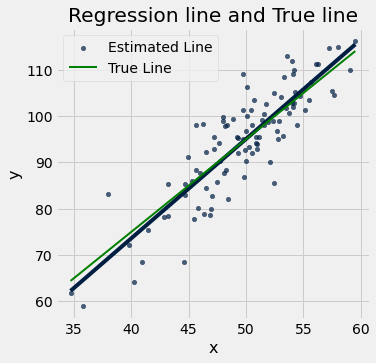

In [6]:
draw_and_compare(2, -5, 100)

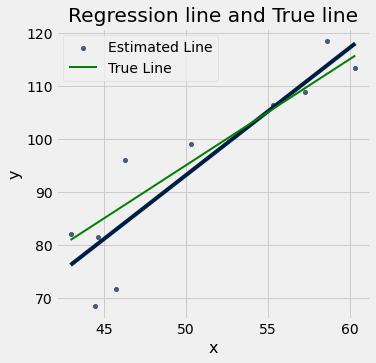

In [7]:
draw_and_compare(2, -5, 10)

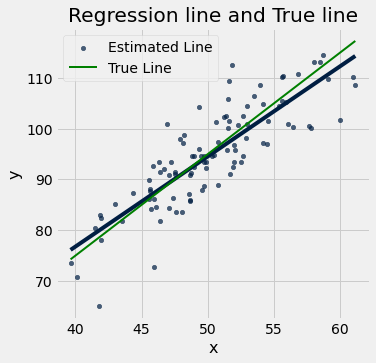

In [8]:
draw_and_compare(2, -5, 100)

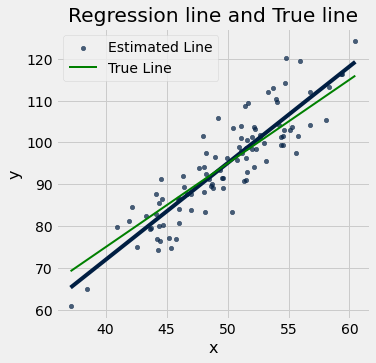

In [9]:
draw_and_compare(2, -5, 100)

<br><br><br>

---

<center> Return to Slides </ceter>

---

<br><br><br>



## Prediction (Demo)

In [10]:
births = Table.read_table('data/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [11]:
# Preterm and postterm pregnancy cutoffs, according to the CDC
37 * 7, 42 * 7

(259, 294)

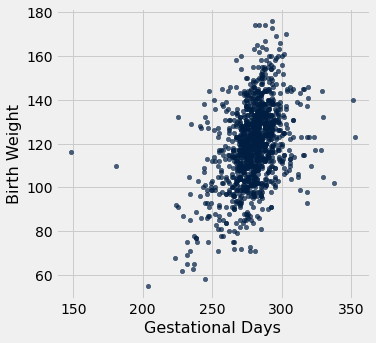

In [12]:
births.scatter('Gestational Days', 'Birth Weight')

In [13]:
births = births.where('Gestational Days', are.between(225, 325))

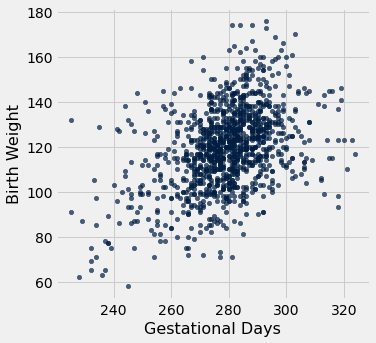

In [14]:
births.scatter('Gestational Days', 'Birth Weight')

## Suppose we assume the regression model

In [15]:
correlation(births, 'Gestational Days', 'Birth Weight')

0.42295118452423991

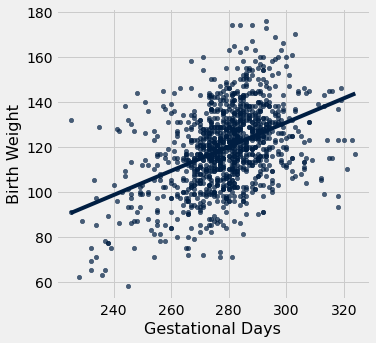

In [16]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

## Prediction at a Given Value of x

In [17]:
def prediction_at(t, x, y, x_value):
    '''
    t - table
    x - label of x column
    y - label of y column
    x_value - the x value for which we want to predict y
    '''
    return slope(t, x, y) * x_value + intercept(t, x, y)

In [18]:
prediction_at_300 = prediction_at(births, 'Gestational Days', 'Birth Weight', 300)
prediction_at_300

130.80951674248769

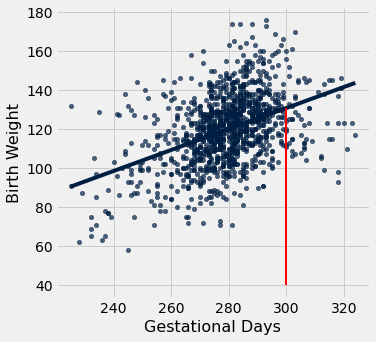

In [19]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='red', lw=2);

<br><br><br>

---

<center> Return to Slides </ceter>

---

<br><br><br>



## Bootstrapping the Sample (Demo)

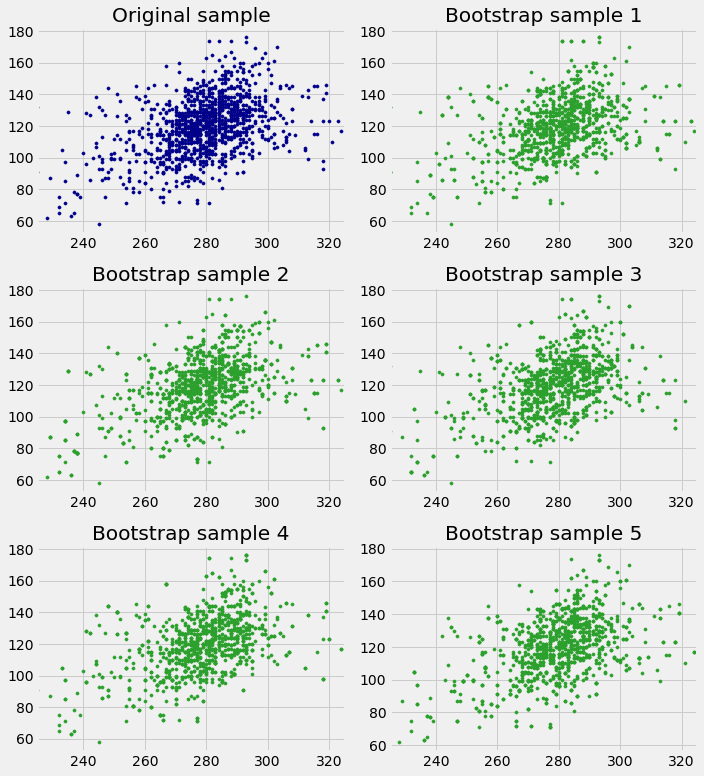

In [20]:


plots.figure(figsize=(10, 11))
plots.subplot(3, 2, 1)
plots.scatter(births[1], births[0], s=10, color='darkblue')
plots.xlim([225, 325])
plots.title('Original sample')

for i in np.arange(1, 6, 1):
    plots.subplot(3,2,i+1)
    resampled = births.sample()
    plots.scatter(resampled.column('Gestational Days'), resampled.column('Birth Weight'), s=10, color='tab:green')
    plots.xlim([225, 325])
    plots.title('Bootstrap sample '+str(i))
plots.tight_layout()

Predicted y from bootstrap sample was 130.982378348
Predicted y from bootstrap sample was 129.685123265
Predicted y from bootstrap sample was 130.247027321
Predicted y from bootstrap sample was 131.342553204


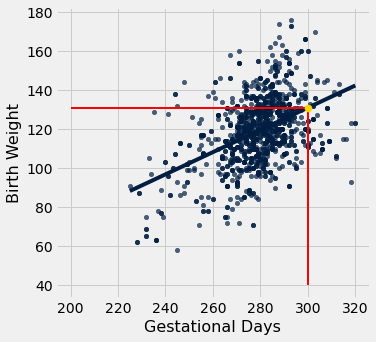

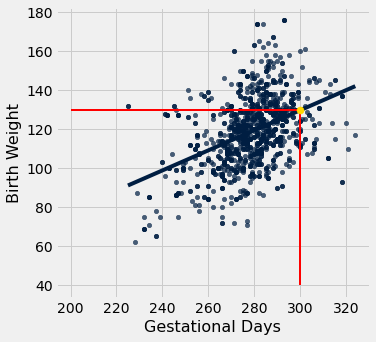

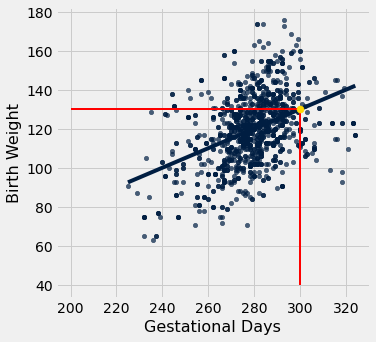

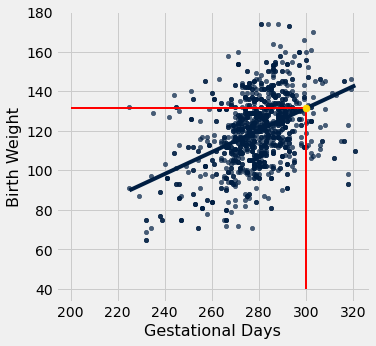

In [21]:
for i in np.arange(4):
    resample = births.sample()
    predicted_y = prediction_at(resample, 'Gestational Days', 'Birth Weight', 300)
    print('Predicted y from bootstrap sample was', predicted_y)
    resample.scatter('Gestational Days', 'Birth Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=50, zorder=3);
    plots.plot([x, x], [40, predicted_y], color='red', lw=2);
    plots.plot([200, x], [predicted_y, predicted_y], color='red', lw=2);

# Predictions at 3 different points:

In [22]:
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])
lines


slope,intercept,at 210,at 300,at 320
0.565085,-37.8481,80.8198,131.677,142.979
0.550976,-34.3893,81.3157,130.904,141.923
0.554727,-35.8608,80.6318,130.557,141.652
0.547657,-33.9826,81.0252,130.314,141.267
0.495661,-18.2215,85.8674,130.477,140.39
0.568355,-38.5117,80.8429,131.995,143.362
0.545083,-32.9116,81.5558,130.613,141.515
0.487076,-16.3598,85.926,129.763,139.504
0.580412,-41.6482,80.2383,132.475,144.084
0.552856,-33.9012,82.1985,131.956,143.013


In [ ]:
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

In [23]:
np.mean(births.column('Gestational Days')), np.mean(births.column('Birth Weight'))

(279.11015490533561, 119.57401032702238)

# Zooming at 300

In [24]:
lines = Table(['slope','intercept', 'at 291', 'at 300', 'at 309'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 291 + b, a * 300 + b, a * 309 + b])
lines


slope,intercept,at 291,at 300,at 309
0.584382,-43.9269,126.128,131.388,136.647
0.540242,-31.0643,126.146,131.008,135.871
0.538661,-31.0344,125.716,130.564,135.412
0.579501,-41.6513,126.983,132.199,137.414
0.516407,-23.6766,126.598,131.246,135.893
0.572086,-40.3231,126.154,131.303,136.451
0.557569,-35.8758,126.377,131.395,136.413
0.536348,-29.3758,126.702,131.529,136.356
0.637572,-57.4905,128.043,133.781,139.519
0.589231,-44.3219,127.144,132.448,137.751


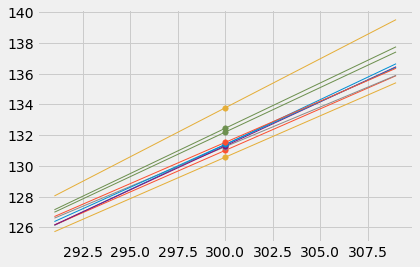

In [25]:
for i in np.arange(lines.num_rows):
     line = lines.row(i)
     plots.plot([291, 309], [line.item('at 291'), line.item('at 309')], lw=1)
     plots.scatter(300, line.item('at 300'), s=30, zorder=3)

## Prediction Interval

In [26]:
np.int=np.int_
def bootstrap_prediction(t, x, y, new_x, repetitions=2500):
    """ 
    Makes a 95% confidence interval for the height of the true line at new_x, 
    using linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """

    # Bootstrap the scatter, predict, collect
    predictions = make_array()
    for i in np.arange(repetitions):
        resample = t.sample()
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)
    round_left = round(left, 3)
    round_right = round(right, 3)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line at x =', new_x)
    print(round_left, 'to', round_right, '( width =', round(right - left, 3), ')') 

Approximate 95%-confidence interval for height of true line at x = 300
129.025 to 132.672 ( width = 3.647 )


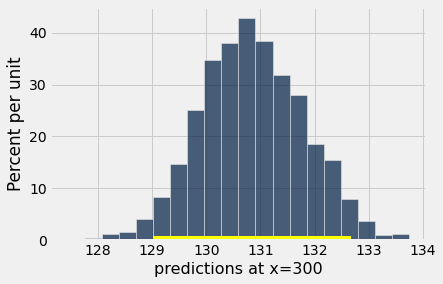

In [27]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)

<br><br><br>

---

<center> Return to Slides </ceter>

---

<br><br><br>



## Predictions at Different Values of x (Demo)

In [ ]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='blue', lw=2);
prediction_at_230 = prediction_at(births, 'Gestational Days', 'Birth Weight', 230)
plots.plot([230, 230], [40, prediction_at_230], color='orange', lw=2);
prediction_at_280 = prediction_at(births, 'Gestational Days', 'Birth Weight', 280)
plots.plot([280, 280], [40, prediction_at_280], color='black', lw=2);

In [ ]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 230)

In [ ]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 280)

In [ ]:
# No need to follow the code in this cell; just understand the graph

lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)

<br><br><br>

---

<center> Return to Slides </ceter>

---

<br><br><br>



## Inference for the True Slope (Demo)

In [ ]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [ ]:
slope(births, 'Gestational Days', 'Birth Weight')

In [ ]:
def bootstrap_slope(t, x, y, repetitions=2500):
    """ 
    Makes a 95% confidence interval for the slope of the true line, 
    using linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    round_left = round(left, 3)
    round_right = round(right, 3)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results (no need to follow this code)
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', round(observed_slope, 3))
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(round_left, 'to', round_right)

In [ ]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight')

<br><br><br>

---

<center> Return to Slides </ceter>

---

<br><br><br>



## Rain on the Regression Parade (Demo Slide 19)

In [ ]:
draw_and_compare(0, 10, 15)

### Maternal Age and Birth Weight

In [ ]:
births.scatter('Maternal Age', 'Birth Weight')

In [ ]:
slope(births, 'Maternal Age', 'Birth Weight')

In [ ]:
births.scatter('Maternal Age', 'Birth Weight', fit_line=True)

<br><br><br>

### Hypothesis Test:

**Null:** Slope of true line is equal to 0.

**Alternative:** Slope of true line is not equal to 0.

In [ ]:
bootstrap_slope(births, 'Maternal Age', 'Birth Weight')